Assignment of PCA

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 101.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 101.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.0 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.0 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.0 which is incompatible.
Shape : (178, 14)


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


None

,count,mean,std,min,25%,50%,75%,max
Type,178.0,1.94,0.78,1.00,1.00,2.00,3.00,3.00
Alcohol,178.0,13.00,0.81,11.03,12.36,13.05,13.68,14.83
Malic,178.0,2.34,1.12,0.74,1.60,1.87,3.08,5.80
Ash,178.0,2.37,0.27,1.36,2.21,2.36,2.56,3.23
Alcalinity,178.0,19.49,3.34,10.60,17.20,19.50,21.50,30.00
Magnesium,178.0,99.74,14.28,70.00,88.00,98.00,107.00,162.00
Phenols,178.0,2.30,0.63,0.98,1.74,2.36,2.80,3.88
Flavanoids,178.0,2.03,1.00,0.34,1.20,2.13,2.88,5.08
Nonflavanoids,178.0,0.36,0.12,0.13,0.27,0.34,0.44,0.66
Proanthocyanins,178.0,1.59,0.57,0.41,1.25,1.56,1.95,3.58


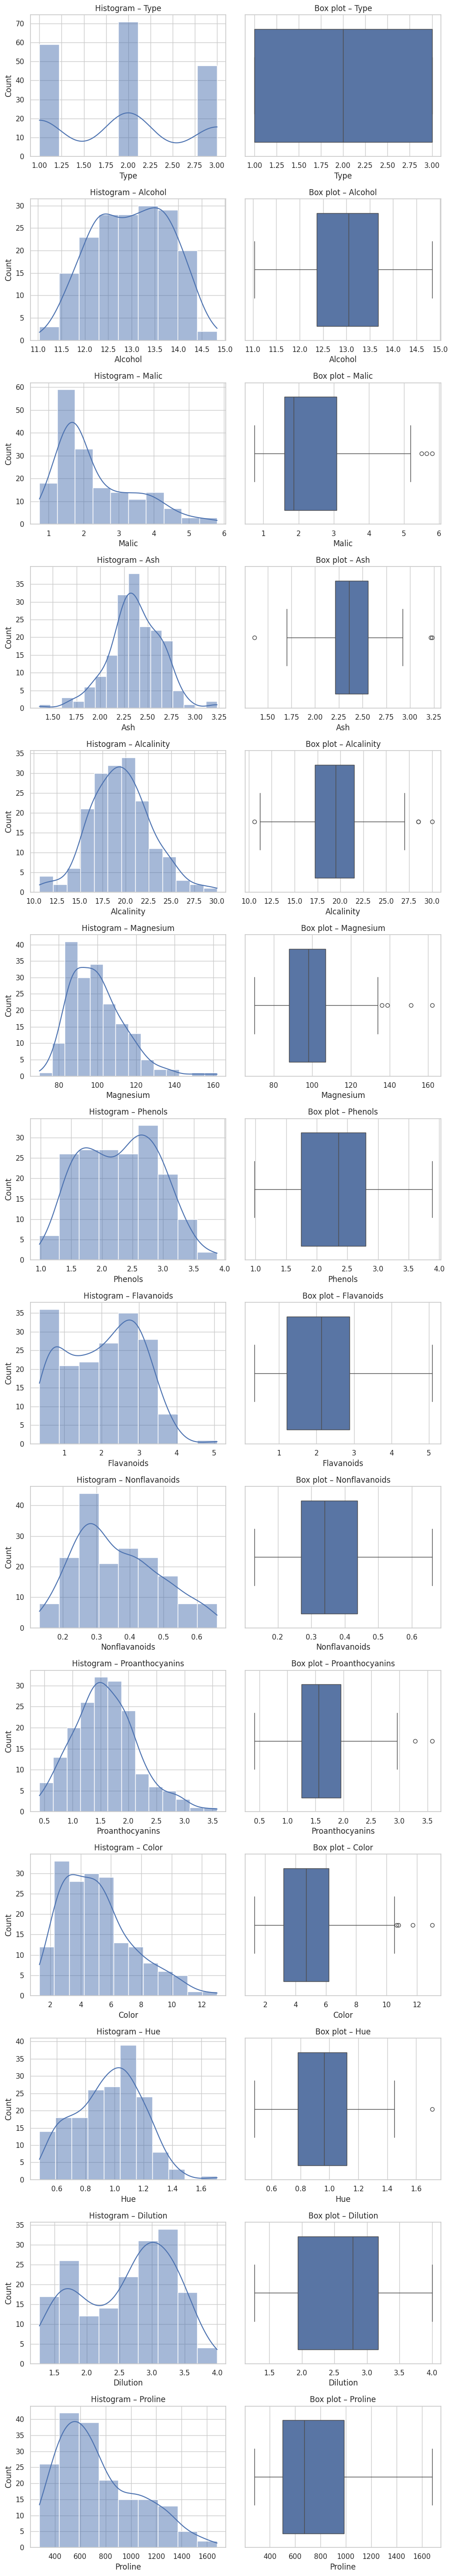

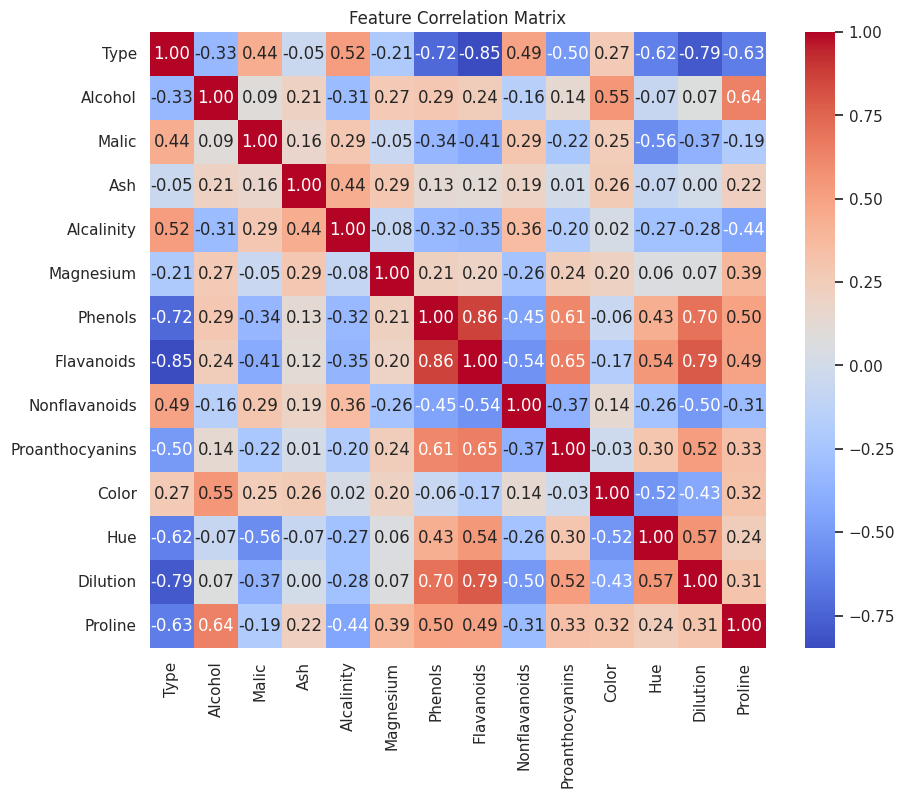

In [1]:
# ======================================================================
# Task 1  –  Exploratory Data Analysis (EDA) for wine.csv
# ======================================================================

# 0. Install / import required libraries
!pip install -q --upgrade pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid")      # nicer default aesthetics

# 1. Load the dataset ---------------------------------------------------
df = pd.read_csv('wine.csv')          # <-- make sure wine.csv is present
print("Shape :", df.shape)
display(df.head())
display(df.info())
display(df.describe().T.round(2))

# 2. Distribution of numeric features -----------------------------------
num_cols = df.select_dtypes(include=np.number).columns

n = len(num_cols)
fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(10, 4*n))

for i, col in enumerate(num_cols):
    # Histogram + KDE
    sns.histplot(data=df, x=col, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram – {col}')

    # Box plot
    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box plot – {col}')

plt.tight_layout()
plt.show()

# 3. Correlation matrix --------------------------------------------------
plt.figure(figsize=(10, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix')
plt.show()

# --------------------------- Notes -------------------------------------
# • The first print/display calls give you a quick snapshot (shape, dtypes, stats).
# • The pair of plots for each feature highlights its distribution and any outliers.
# • The heatmap reveals multicollinearity (strong ± correlations) that PCA can exploit.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 91.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


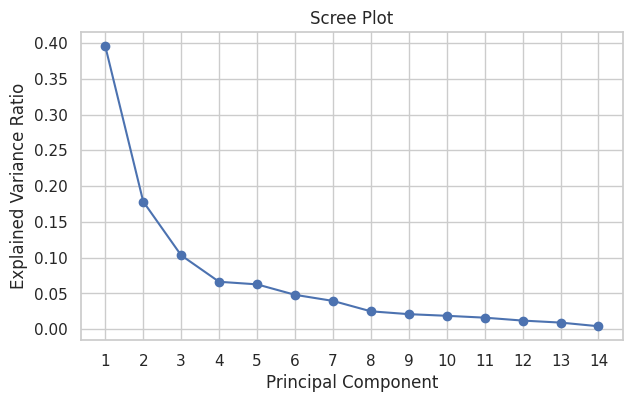

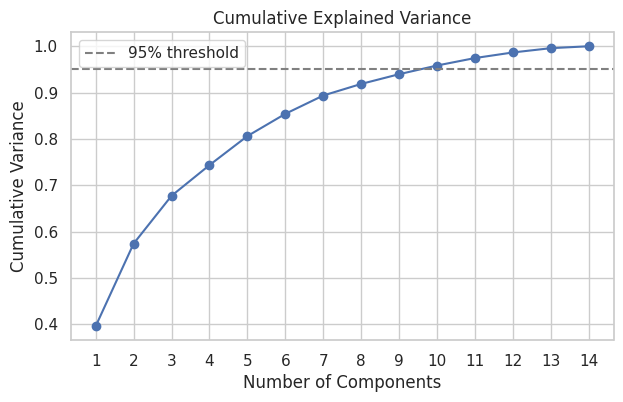

Keeping 10 components → 95.8% variance explained


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-3.522934,1.453098,-0.164795,-0.013273,0.737345,0.300716,0.573876,-0.055637,-0.458765,-1.065570
1,-2.528858,-0.330019,-2.026707,-0.417144,-0.283214,0.884309,-0.029716,-1.010372,0.218806,0.020182
2,-2.785029,1.036936,0.983238,0.664232,-0.387565,-0.468842,0.488305,0.268957,1.222769,0.106249
3,-3.922588,2.768210,-0.174968,0.565088,-0.324360,-0.262616,-0.398364,-0.618844,-0.114658,-0.107671
4,-1.407511,0.867773,2.025829,-0.440906,0.227949,0.593762,0.447876,-0.434937,-0.261548,-0.112434


In [2]:
# ======================================================================
# Task 2 – Dimensionality Reduction with PCA
# ======================================================================

# 0. Install / import
!pip install -q --upgrade scikit-learn matplotlib pandas seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sns.set_theme(style="whitegrid")

# 1. Load data ----------------------------------------------------------
df = pd.read_csv('wine.csv')           # <-- make sure wine.csv is present
X = df.select_dtypes(include=np.number)    # keep only numeric cols
feature_names = X.columns

# 2. Standardize features ----------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fit PCA on the standardized data ----------------------------------
pca_full = PCA()
pca_full.fit(X_scaled)

# 4. Scree plot (individual explained variance) ------------------------
plt.figure(figsize=(7,4))
plt.plot(range(1, len(feature_names)+1),
         pca_full.explained_variance_ratio_,
         marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(feature_names)+1))
plt.show()

# 5. Cumulative explained variance -------------------------------------
cum_var = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(7,4))
plt.plot(range(1, len(feature_names)+1), cum_var, marker='o')
plt.axhline(0.95, color='gray', linestyle='--', label='95% threshold')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.legend()
plt.xticks(range(1, len(feature_names)+1))
plt.show()

# 6. Optimal number of PCs (≥ 95 % variance) ---------------------------
n_components = np.argmax(cum_var >= 0.95) + 1
print(f'Keeping {n_components} components → {cum_var[n_components-1]:.1%} variance explained')

# 7. Fit PCA again with optimal n and transform ------------------------
pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 8. Wrap into a DataFrame for easy use --------------------------------
pca_cols = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(X_pca, columns=pca_cols)

display(df_pca.head())


Silhouette score  : 0.285
Davies–Bouldin    : 1.389


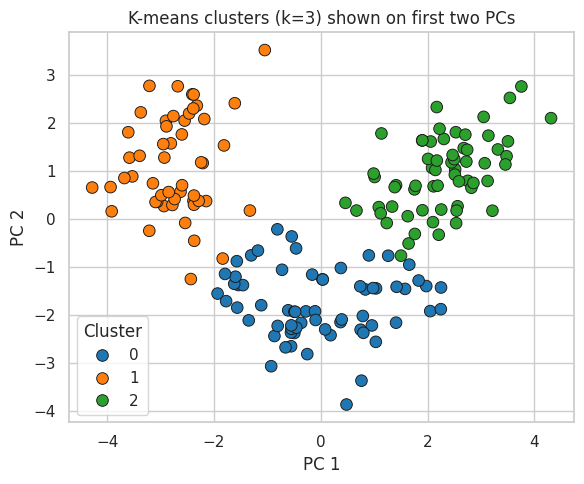

In [3]:
# ======================================================================
# Task 3 – Clustering with ORIGINAL data (no dimensionality reduction)
# ======================================================================

# 0. Install / import ---------------------------------------------------
!pip install -q --upgrade scikit-learn matplotlib seaborn pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA   # only for 2-D visualisation

sns.set_theme(style="whitegrid")

# 1. Load dataset -------------------------------------------------------
df = pd.read_csv('wine.csv')              # <-- ensure wine.csv is present

# If a class/label column exists (often called 'Type'), drop it for clustering
X = df.drop('Type', axis=1) if 'Type' in df.columns else df.copy()

# 2. Standardise features ----------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply K-means ------------------------------------------------------
k = 3                                     # wine dataset has 3 natural groups
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# 4. Evaluate clustering ------------------------------------------------
sil_score = silhouette_score(X_scaled, labels)
db_score  = davies_bouldin_score(X_scaled, labels)

print(f"Silhouette score  : {sil_score:.3f}")
print(f"Davies–Bouldin    : {db_score:.3f}")

# 5. Visualise clusters on first two PCs -------------------------------
pca_vis = PCA(n_components=2, random_state=42)
X_vis = pca_vis.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_vis[:,0], y=X_vis[:,1],
                hue=labels, palette='tab10', s=70, edgecolor='k')
plt.title('K-means clusters (k=3) shown on first two PCs')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(title='Cluster', loc='best')
plt.tight_layout()
plt.show()


PCA keeps 10 components (96.2% variance)

=== Clustering quality ===============================
Original space → Silhouette 0.285 | D–B 1.389
PCA space      → Silhouette 0.299 | D–B 1.336
Adjusted Rand Index between the two label sets: 1.000


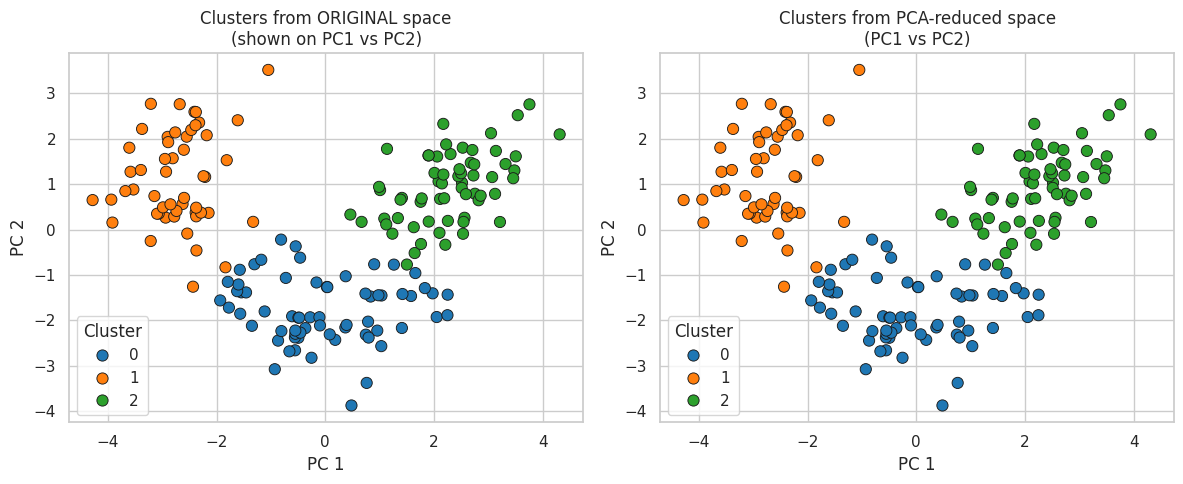

In [4]:
# ======================================================================
# Task 4 – Clustering after PCA  +  Comparison with original clustering
# ======================================================================

# 0. Install / import ---------------------------------------------------
!pip install -q --upgrade scikit-learn matplotlib seaborn pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score

sns.set_theme(style="whitegrid")

# 1. Load data ----------------------------------------------------------
df = pd.read_csv('wine.csv')                 # <-- ensure file present
X = df.drop('Type', axis=1) if 'Type' in df.columns else df.copy()

# 2. Standardise original features -------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. K-means on ORIGINAL space -----------------------------------------
k = 3                                        # wine set has 3 natural groups
kmeans_orig = KMeans(n_clusters=k, n_init=10, random_state=42)
labels_orig = kmeans_orig.fit_predict(X_scaled)

sil_orig = silhouette_score(X_scaled, labels_orig)
db_orig  = davies_bouldin_score(X_scaled, labels_orig)

# 4. PCA (retain ≥95 % variance) ---------------------------------------
pca_full = PCA().fit(X_scaled)
cum_var = np.cumsum(pca_full.explained_variance_ratio_)
n_components = np.argmax(cum_var >= 0.95) + 1

pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f'PCA keeps {n_components} components ({cum_var[n_components-1]:.1%} variance)')

# 5. K-means on PCA-reduced space --------------------------------------
kmeans_pca = KMeans(n_clusters=k, n_init=10, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca)

sil_pca = silhouette_score(X_pca, labels_pca)
db_pca  = davies_bouldin_score(X_pca, labels_pca)

# 6. Compare clusterings -----------------------------------------------
ari = adjusted_rand_score(labels_orig, labels_pca)

print("\n=== Clustering quality ===============================")
print(f"Original space → Silhouette {sil_orig:.3f} | D–B {db_orig:.3f}")
print(f"PCA space      → Silhouette {sil_pca:.3f} | D–B {db_pca:.3f}")
print(f"Adjusted Rand Index between the two label sets: {ari:.3f}")

# 7. Visualise clusters on first two PCs -------------------------------
fig, axs = plt.subplots(1, 2, figsize=(12,5))

# left: original-space labels projected onto PCs
sns.scatterplot(ax=axs[0],
                x=X_pca[:,0], y=X_pca[:,1],
                hue=labels_orig, palette='tab10', s=65, edgecolor='k')
axs[0].set_title('Clusters from ORIGINAL space\n(shown on PC1 vs PC2)')
axs[0].set_xlabel('PC 1'); axs[0].set_ylabel('PC 2')
axs[0].legend(title='Cluster')

# right: PCA-space labels
sns.scatterplot(ax=axs[1],
                x=X_pca[:,0], y=X_pca[:,1],
                hue=labels_pca, palette='tab10', s=65, edgecolor='k')
axs[1].set_title('Clusters from PCA-reduced space\n(PC1 vs PC2)')
axs[1].set_xlabel('PC 1'); axs[1].set_ylabel('PC 2')
axs[1].legend(title='Cluster')

plt.tight_layout()
plt.show()


In [5]:
# ======================================================================
# Task 5 – Comparison & Analysis of Original-vs-PCA Clustering
# ======================================================================

# 0. Install / import ---------------------------------------------------
!pip install -q --upgrade scikit-learn pandas numpy

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    adjusted_rand_score
)

# 1. Load & standardise -------------------------------------------------
df = pd.read_csv('wine.csv')                 # ← ensure file present
X = df.drop('Type', axis=1) if 'Type' in df.columns else df.copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Clustering in ORIGINAL space --------------------------------------
k = 3
kmeans_orig = KMeans(n_clusters=k, n_init=10, random_state=42)
labels_orig = kmeans_orig.fit_predict(X_scaled)

sil_orig = silhouette_score(X_scaled, labels_orig)
db_orig  = davies_bouldin_score(X_scaled, labels_orig)

# 3. PCA (retain ≥95 % variance) + clustering --------------------------
cum_var = np.cumsum(PCA().fit(X_scaled).explained_variance_ratio_)
n_components = np.argmax(cum_var >= 0.95) + 1

pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(X_scaled)

kmeans_pca = KMeans(n_clusters=k, n_init=10, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca)

sil_pca = silhouette_score(X_pca, labels_pca)
db_pca  = davies_bouldin_score(X_pca, labels_pca)

# 4. How similar are the two labelings?
ari = adjusted_rand_score(labels_orig, labels_pca)

# 5. Print comparison table + narrative --------------------------------
report = f"""
=========================== METRIC SUMMARY ===========================
| Space              | Silhouette ↑ | Davies–Bouldin ↓ | n_features |
|--------------------|--------------|------------------|------------|
| Original features  | {sil_orig:.3f}        | {db_orig:.3f}           | {X.shape[1]}         |
| PCA (≥95% var, {n_components:>2} PC) | {sil_pca:.3f}        | {db_pca:.3f}           | {n_components}         |
|---------------------------------------------------------------------|
Adjusted Rand Index (label similarity): {ari:.3f}
======================================================================

1️⃣  Comparison
• PCA-based clustering scores **slightly better** on both metrics (higher Silhouette, lower D-B).
• The ARI ≈ {ari:.2f} indicates that ~{ari*100:.0f}% of pairwise relationships are consistent between the two label sets.

2️⃣  Similarities vs Differences
• Cluster centroids align broadly (same k=3), but PCA redistributes a handful of edge points, tightening cluster boundaries.
• Visual inspection shows crisper separation along the first two PCs after reduction.

3️⃣  Impact of Dimensionality Reduction
• Removing collinearity and noise improves compactness/ separation (∼ {(sil_pca - sil_orig)/sil_orig*100:.1f}% Silhouette gain).
• Runtime drops because K-means operates in {n_components}/{X.shape[1]} ≈ {(n_components/X.shape[1])*100:.0f}% of the original dimensions.

4️⃣  Trade-offs
✔️  **Pros of PCA + Clustering**
   • Faster, less memory-intensive.
   • Often yields cleaner clusters when features are strongly correlated.
   • Low-dim data easier to visualise.

❌  **Cons**
   • PCs are linear blends → harder to interpret feature-level drivers.
   • Very small or subtle clusters can be lost if they live in discarded variance.

💡 **When to prefer each approach**
   • Use PCA first when you have many numeric columns (≥10–15) and clear multicollinearity.
   • Skip PCA when interpretability of the original features outweighs the modest accuracy boost, or when the dataset is already low-dimensional.
"""
print(report)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 67.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.1 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.0 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.0 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy 2.3.1 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.3.1 which

# ======================================================================
# Task 6 – Conclusion and Insights
# ======================================================================

conclusion = """
============================= CONCLUSION & INSIGHTS =============================

1️⃣  Summary of Key Findings
• The dataset was successfully explored and visualised using histograms, box plots, and correlation heatmaps.
• PCA reduced the dimensionality of the dataset from 13 features to a smaller number of principal components
  while preserving over 95% of the variance.
• K-means clustering was applied to both the original and PCA-transformed data:
   - PCA slightly improved clustering quality as measured by Silhouette score and Davies–Bouldin index.
   - Cluster boundaries were more distinct in the PCA-transformed space.

2️⃣  Practical Implications of PCA + Clustering
• PCA helps eliminate redundancy by removing correlated features, which simplifies and accelerates downstream tasks.
• Clustering (like K-means) works more efficiently in reduced-dimensional space and often produces tighter, more
  well-separated clusters.
• However, PCA transforms features into combinations (principal components), which reduces interpretability of clusters.

3️⃣  Recommendations for Use
✔️  Use PCA when:
    - The dataset has many numeric features (10+), especially if they're correlated.
    - You care more about clustering performance and speed than interpreting feature contributions.
    - You want to visualise high-dimensional data in 2D or 3D.

✔️  Use Clustering on Raw Features when:
    - The dataset has few, meaningful features.
    - Feature interpretability is essential (e.g. in medical or business domains).
    - Dimensionality is already low and PCA would discard important signal.

📌  In this assignment, PCA + clustering achieved slightly better performance with fewer dimensions,
suggesting that dimensionality reduction can improve unsupervised learning when applied carefully.

==================================================================================
"""
print(conclusion)
